In [ ]:
"""
Author: Ryleigh J. Bruce
Date: June 10, 2024

Purpose: To generate a treemap to compare the volume of sightings across animal species and seasons.


Note: The author generated this text in part with GPT-4,
OpenAI’s large-scale language-generation model. Upon generating
draft code, the authors reviewed, edited, and revised the code
to their own liking and takes ultimate responsibility for
the content of this code.

"""

## Module: Mount the Notebook to Google Drive and Install Necessary Libraries

Here the drive module is imported, allowing the Colab environment to access files within Google Drive. The notebook is then mounted to Google Drive so that it can interact with the files.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This module imports the `pandas`, `matplotlib`, `squarify`, and `numpy` libraries. The `pandas` library is crucial for data manipulation, and `matplotlib` is a plotting library that allows various visualizations to be created in Python. `Squarify` is a specialized library to create treemaps and `numpy` is useful for handling arrays and other aspects of numerical computing.

In [ ]:
!pip install squarify
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import numpy as np

# Creating a Single Treemap

## Module: Create a DataFrame Using the Excel File

This line of code loads the provided Excel file and loads it into a two-dimensional DataFrame, a data format consisting of rows and columns.






In [ ]:
# Load the data into a Pandas dataframe
df = pd.read_excel("/content/drive/MyDrive/shared-data/Notebook datafiles/combined_csv_animal_flag_justanimals_location_flat.xlsx")

Here the `groupby()` function is used to group the rows within the DataFrame by the values in the `SpeciesList` column. This means that all rows containing the same species name are grouped. `[“SpeciesCount”].sum` calculates the sum of all of the values within the `SpeciesCount` column for each species group. The final portion of this line, `.reset_index()`, resets the index of the DataFrame and returns the `SpeciesList` to a column from its grouped state.

In [ ]:
# Summarize the data for the treemap
species_counts = df.groupby("SpeciesList")["SpeciesCount"].sum().reset_index()

Here the DataFrame is sorted based on the values in the `SpeciesCount` column. `ascending=False` ensures that the values are sorted in descending order, to ensure that the most significant categories will be seen first.

In [ ]:
# Sort the data for better visualization
species_counts = species_counts.sort_values(by="SpeciesCount", ascending=False)

## Module: Prepare the Values to be Plotted

The `squarify.normalize_sizes()` function normalizes the size of the rectangles to be used in the treemap. The `100,100` values represent the width and height of the treemap layout.

In [ ]:
# Normalize sizes
sizes = squarify.normalize_sizes(species_counts["SpeciesCount"], 100, 100)

`num_categories = len(species_counts)` counts and returns the number of rows in the species_counts DataFrame and stores it in the `num_categories` variable. This value is then used to determine the number of unique colors that must be stored in the `colors` variable. These colors are drawn from a pre-existing colormap called `tab20c` which is called using the `plt.get_cmap() function`.

In [ ]:
# Create a colormap
num_categories = len(species_counts)
colors = plt.get_cmap('tab20c')(np.linspace(0, 1, num_categories))

## Module: Create the Figure

Here the `matplotlib` library is used to create a new figure and set of subplots. The size is specified using `figsize=(12, 8)` which means that the created figure will be 12 inches wide and 8 inches tall.

`squarify.plot()` creates the treemap plot using the normalized rectangles and the colors determined in previous modules, while the `ax=ax` and `pad=True` parameters enhance plot legibility.

In [ ]:
# Create a squarify plot
fig, ax = plt.subplots(figsize=(12, 8))
squarify.plot(sizes=sizes,
              color=colors,
              alpha=.8,
              ax=ax,
              pad=True)

This piece of code ensures that the generated graph is free of axis lines, ticks, and labels.

In [ ]:
# Hide axes
ax.axis('off')

## Module: Create a Legend and Display the Plot

The first line of code creates a list of `handles`, objects that can be used in a legend. The `handles` being created here are small rectangles of color according to the corresponding species.

The second line extracts the labels for the legend from the `species_counts` DataFrame.

In [ ]:
# Create a legend
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(num_categories)]
labels = species_counts["SpeciesList"]

This code anchors the bounding box to the center left of the remaining space and sets the title of the legend as ‘Species’.

In [ ]:
ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), title="Species")

To display the final plot:

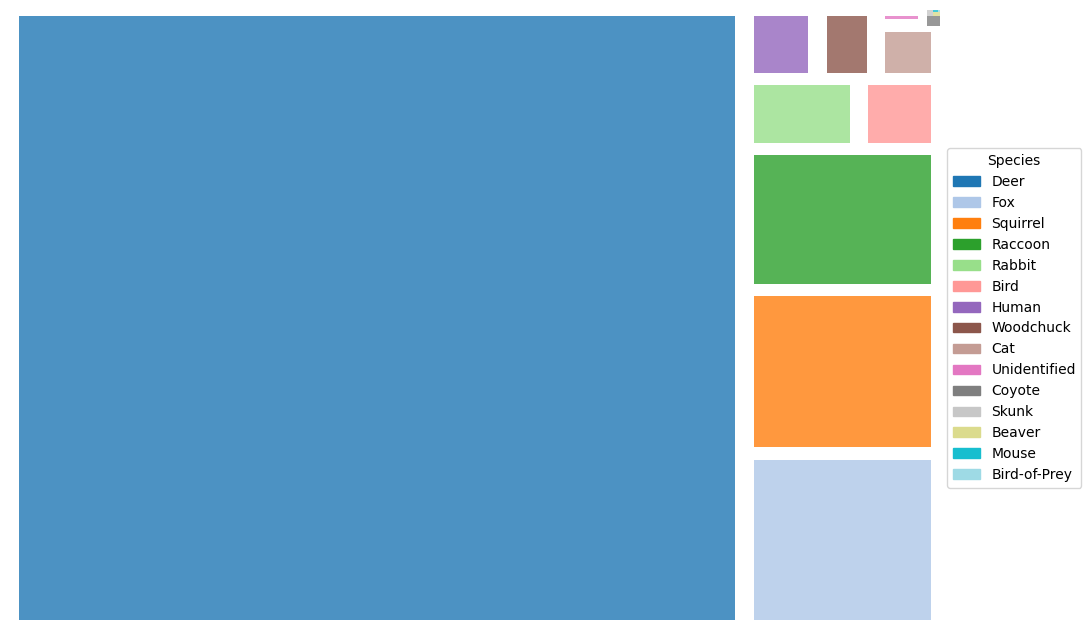

In [ ]:
# Display the plot
plt.show()

#Creating a Treemap for Each Season

The same modules will need to be installed as when a single graph was being created.

In [ ]:
!pip install squarify
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import numpy as np

Here the script uses the `pandas` library to transform the information in the Excel file into a two-dimensional DataFrame, just as it did in the previous script.

In [ ]:
# Load the data
df = pd.read_excel("/content/drive/MyDrive/shared-data/Notebook datafiles/combined_csv_animal_flag_justanimals_location_flat.xlsx")

The ‘Date’ column from the DataFrame is then converted into datetime format using the `pd.to_datetime function`. The script then replaces the original ‘Date’ column with the data newly converted in datetime format.

## Module: Manipulating the DataFrame

In [ ]:
# Convert dates to datetime
df['Date'] = pd.to_datetime(df['Date'])

The `get_season()` function uses the month data in integer format and returns a string representing the seasons the given month falls in.

In [ ]:
# Define a function to determine the season based on the month
def get_season(month):
    if month in (12, 1, 2):
        return 'Winter'
    elif month in (3, 4, 5):
        return 'Spring'
    elif month in (6, 7, 8):
        return 'Summer'
    elif month in (9, 10, 11):
        return 'Autumn'

The `df[‘Date’].dt.month` function extracts the month from the ‘Date’ column within the DataFrame and `.apply(get_season)` applies the function defined previously to convert the month data into its season, creating a new ‘Season’ column within the DataFrame to store the converted information.

In [ ]:
# Apply the season function to each date
df['Season'] = df['Date'].dt.month.apply(get_season)

The DataFrame is then filtered to only include information relevant to the desired location ID (here it is location 7) with the code `df['locationID'] == location_id`. This is done by creating a Boolean series comparing the ‘locationID’ column in the DataFrame to the location_id variable. In rows where the value is the same, it will be ‘True’, and ‘False’ for all other values. The returned DataFrame is then assigned to the `df` variable for later use.

In [ ]:
# Specify the locationID for filtering and title
location_id = 7
df = df[df['locationID'] == location_id]

Here a DataFrame is created called `seasonal_species_counts` by grouping the original DataFrame by the ‘Season’ and ‘SpeciesList’ columns. Rows with the same unique combination of ‘Season’ and ‘SpeciesList’ are then grouped together. The `agg` function is then used to calculate the sum for the ‘SpeciesCount’ value in each of the grouped rows.

In [ ]:
# Group data by season and species and sum species counts
seasonal_species_counts = df.groupby(['Season', 'SpeciesList']).agg({'SpeciesCount': 'sum'}).reset_index()

The first line retrieves the unique species in the ‘SpeciesList’ column of the DataFrame `seasonal_species_counts` and assigns them to the variable `unique_species`.Then the get_cmpa function is used in the next line to import the ‘tab20c’ colormap in order to assign a unique color to each species. In the final line of the code block, a dictionary is created where each key is a species name from the `unique_species` variable and the value is a color from the imported colormap.

In [ ]:
# Determine the maximum number of unique species across all seasons
unique_species = seasonal_species_counts['SpeciesList'].unique()
color_map = plt.get_cmap('tab20c')
colors = {species: color_map(i % color_map.N) for i, species in enumerate(unique_species)}

Here the script determines the maximum number of sightings for each season across all species and stores those values in the `max_total value`. In cases where a season is missing information, the value is automatically set to 0.

In [ ]:
# Get the total of sightings in each season to scale the plots
season_totals = seasonal_species_counts.groupby('Season')['SpeciesCount'].sum().reindex(['Winter', 'Spring', 'Summer', 'Autumn'], fill_value=0)
max_total = season_totals.max()

## Module: Preparing to Plot the Treemaps

The following code blocks prepare a plot for each of the treemaps that corresponds with the volume of sightings for the given season. for season in season_totals.index iteratively processes each season stored in the season_total variable. The script then selects only the rows from seasonal_species_count where the season matches the current iteration’s season. If there is recorded information to plot, `base_size = 5` and `fig_size = base_size * (season_totals[season] / max_total)` set the size of the plot based on the total spotted species for a season. The previously assigned colors are then retrieved and the treemap is generated using the calculated sizes and colors.

`ax.set_title(f'{season} (Total Sightings: {season_totals[season]:,.0f})')` ensures that the correct season is printed for each graph, and `axis(‘off’)` removes unnecessary axis labels to increase legibility.

If there is no information recorded for a given season, the script will skip over the previous steps and simply print “No information gathered for `{season}` at Location `{location_id}`.” and continue on to the next season.

In [ ]:
# Plotting
for season in season_totals.index:
    group = seasonal_species_counts[seasonal_species_counts['Season'] == season]
    if not group.empty:
        base_size = 5  # Base size for the smallest season graph
        # Scaling the figure size based on the relative volume of sightings
        fig_size = base_size * (season_totals[season] / max_total)
        fig, ax = plt.subplots(figsize=(fig_size, fig_size))

        sizes = squarify.normalize_sizes(group['SpeciesCount'], season_totals[season], season_totals[season])
        plot_colors = [colors[species] for species in group['SpeciesList']]

        squarify.plot(sizes=sizes, color=plot_colors, alpha=0.8, pad=0.5, ax=ax)
        ax.set_title(f'{season} (Total Sightings: {season_totals[season]:,.0f})')
        ax.axis('off')
    else:
        print(f"No information gathered for {season} at Location {location_id}.")

## Module: Creating the Legend and Displaying the Treemap

The script creates several rectangular handles that correspond with the colors used in the treemap to depict the species. `fig.legend(handles, unique_species, loc='upper right', bbox_to_anchor=(1.2, 1), title="Species")` creates a legend with the handles and corresponding labels and locates it at the upper right-hand corner outside of the plot area. `plt.subplots_adjust(right=0.85)` adjusts the parameters of the subplot to ensure that there is enough room to place the legend. The plot and legend are then displayed using the `plt.show()` function.

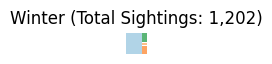

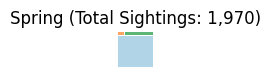

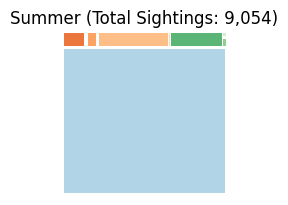

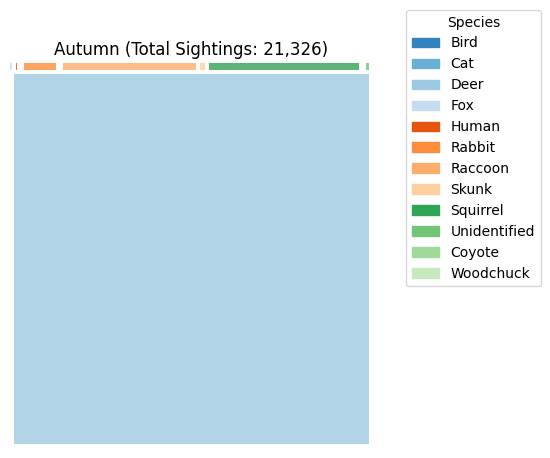

In [ ]:
# Legend for the species
handles = [plt.Rectangle((0, 0), 1, 1, color=color_map(i % color_map.N)) for i, species in enumerate(unique_species)]
fig.legend(handles, unique_species, loc='upper right', bbox_to_anchor=(1.2, 1), title="Species")

plt.subplots_adjust(right=0.85)  # Adjust subplot sizes to fit legend
plt.show()